## Занятие 6
## Математический анализ
## Дифференцирование

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду.
$$
y = x^2e^{-x}
$$

In [79]:
x = sympy.Symbol("x")
def f(x):
  return x**2*sympy.E**(-x)

***Точки экстремума и область определения***

Производная функции:


x*(2 - x)*exp(-x)

Область определения:


Reals

Экстремумы: [0, 2]


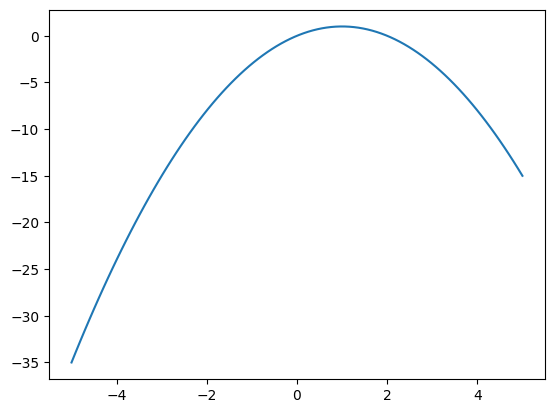

In [80]:
def df(x):
 return simplify(f(x).diff(x))
print("Производная функции:")
display(df(x))
df_D = continuous_domain(df(x), x, S.Reals) # Это область определения производной.
print("Область определения:")
display(df_D)
X = np.linspace(-5, 5, 100)
X_df_D = [x for x in X if x in df_D] # Отбираем только точки из области определения производной.
df_num, df_denom = fraction(df(x))
df_num_Y = [df_num.subs(x, x0) for x0 in X_df_D] # Значения числителя производной в точках, где существует производная.
plt.plot(X_df_D, df_num_Y)
df_roots = sympy.solve(df(x))
print("Экстремумы:", df_roots)

In [21]:
# Возьмем 3 случайных значения рядом с экстремумами и посмотрим их знак
print(float(df(x).subs(x, -1)), float(df(x).subs(x, 1)), float(df(x).subs(x, 3)))

-8.154845485377136 0.36787944117144233 -0.14936120510359183


Производная меняет знак с - на +, поэтому 0 - точка минимума а 2 - точка максимума

***Точки перегиба***

In [28]:
# Найдем вторую производную
def df2(x):
 return simplify(f(x).diff(x, 2))
display(df2(x))

(x**2 - 4*x + 2)*exp(-x)

In [42]:
# найдем корни уравнения x^2-4x+2=0
def g(x):
  return x**2-4*x+2
df2_roots = sympy.solve(g(x))
df2_roots = [float(i) for i in df2_roots]
print(df2_roots)
# Возьмем 3 случайных значения рядом с точками перегиба и посмотрим их знак
print(float(df(x).subs(x, -1)), float(df(x).subs(x, 1)), float(df(x).subs(x, 4)))

[0.585786437626905, 3.414213562373095]
-8.154845485377136 0.36787944117144233 -0.14652511110987343


Двойная производная меняет знак рядом с точками 0.58 и 3.41. Следовательно 0.58 и 3.41 - точки перегиба

***Асимптоты***

In [35]:
# Найдем асимптоты
import math
print(f(x).limit(x, math.inf, dir='+'))

0


Значение предела при x->+oo равно 0. Следовательно существует горизонтальная асимптота y=0.

**График функции**

На графике отметим точки пересечения точками максимума , точками перегиба и горизонтальную асимптоту

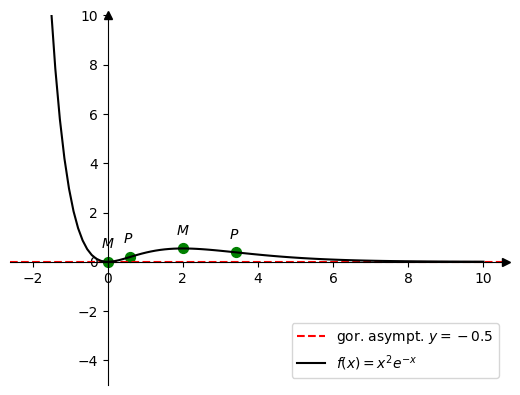

In [73]:
minY = -5
maxY = 10
ax = plt.gca()
ax.set_ylim(minY, maxY)
g_as = 0
ax.axhline(y=g_as, color='red', linestyle='--',
 label=r'gor. asympt. $y=' + latex(v_as) + r'$') # График вертикальной асимптоты
X_D = np.linspace(-2, 10, 100)
Y_D = [f(x) for x in X_D]
ax.plot(X_D, Y_D, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')
roots = []
roots.extend(df_roots)
roots.extend(df2_roots)
points_y = [float(f(point)) for point in roots]
annotations = [r'$M$', r'$M$', r'$P$', r'$P$']
ax.scatter(roots, points_y, 50, color='green')
for i, x0 in enumerate(roots):
 ax.annotate(annotations[i], xy=(x0, points_y[i]), xycoords='data',
 xytext=(-5, 10), textcoords='offset points', fontsize=10)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.legend(loc='lower right')
plt.show()

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду.
$$
y=xe^{2/x} + 1
$$

In [116]:
x = sympy.Symbol("x")
def f(x):
  return x*sympy.E**(2/x) + 1
D = continuous_domain(f(x), x, S.Reals)
print("Область определения: ")
D

Область определения: 


Union(Interval.open(-oo, 0), Interval.open(0, oo))

***Экстремумы функции***

Производная функции:


(x - 2)*exp(2/x)/x

Область определения:


Union(Interval.open(-oo, 0), Interval.open(0, oo))

Экстремумы: [2]


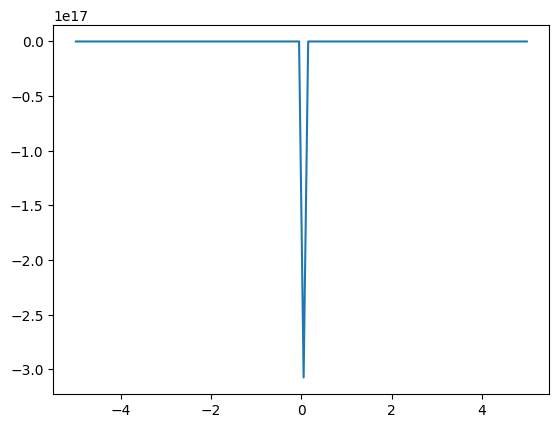

In [82]:
def df(x):
 return simplify(f(x).diff(x))
print("Производная функции:")
display(df(x))
df_D = continuous_domain(df(x), x, S.Reals) # Это область определения производной.
print("Область определения:")
display(df_D)
X = np.linspace(-5, 5, 100)
X_df_D = [x for x in X if x in df_D] # Отбираем только точки из области определения производной.
df_num, df_denom = fraction(df(x))
df_num_Y = [df_num.subs(x, x0) for x0 in X_df_D] # Значения числителя производной в точках, где существует производная.
plt.plot(X_df_D, df_num_Y)
df_roots = sympy.solve(df(x))
print("Экстремумы:", df_roots)

In [84]:
# Возьмем 2 случайных значения рядом с экстремом и посмотрим их знак
print(float(df(x).subs(x, 1)), float(df(x).subs(x, 3)))

-7.38905609893065 0.6492446803515586


Производная меняет знак с - на +, поэтому 2 - точка минимума.

***Точки перегиба***

In [88]:
# Найдем вторую производную
def df2(x):
 return simplify(f(x).diff(x, 2))
display(df2(x))
df2_roots = sympy.solve(df2(x))
print("Точки перегиба:", df2_roots)

4*exp(2/x)/x**3

Точки перегиба: []


Точки перегиба не существуют

***Асимптоты***

Возможна вертикальная асимптота в точке 0. Вычислим соответствующие пределы

In [123]:
 f(x).limit(x, 0)

oo

Значит, x=0 - вертикальная асимптота, горизонтальных и наклонных асимптот быть не может, поскольку область определения конечна.

***График функции***

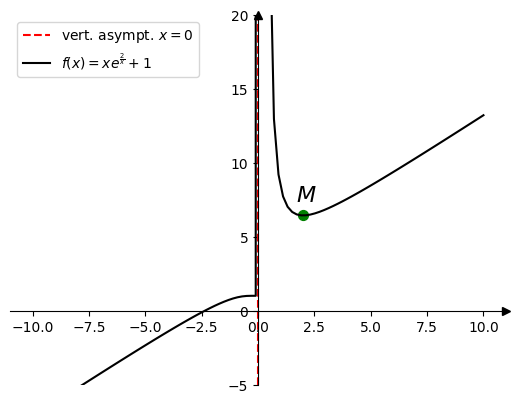

In [99]:
minY = -5
maxY = 20
ax = plt.gca()
ax.set_ylim(minY, maxY)
v_as = 0
ax.axvline(x=v_as, color='red', linestyle='--',
 label=r'vert. asympt. $x=' + latex(v_as) + r'$') # График вертикальной асимптоты
X = np.linspace(-10, 10, 100)
X_D = [x for x in X if x in D]
Y_D = [f(x) for x in X if x in D]
ax.plot(X_D, Y_D, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')
roots = sympy.solve(f(x), S.Reals)
roots.extend(df_roots)
points_y = [float(f(point)) for point in roots]
annotations = [r'$M$']
ax.scatter(roots, points_y, 50, color='green')
for i, x0 in enumerate(roots):
 ax.annotate(annotations[i], xy=(x0, points_y[i]), xycoords='data',
 xytext=(-5, 10), textcoords='offset points', fontsize=16)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.legend(loc='upper left')
plt.show()

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду.

Вариант $31$
$$
(2x-4)(6x-1)/(4x-6)
$$

In [126]:
x = sympy.Symbol("x")
def f(x):
  return (2*x-4)*(6*x-1)/(4*x-6)
D = continuous_domain(f(x), x, S.Reals)
print("Область определения: ")
D

Область определения: 


Union(Interval.open(-oo, 3/2), Interval.open(3/2, oo))

***Точки экстремума***

Производная функции:


(12*x**2 - 36*x + 35)/(4*x**2 - 12*x + 9)

Область определения:


Union(Interval.open(-oo, 3/2), Interval.open(3/2, oo))

Экстремумы: []


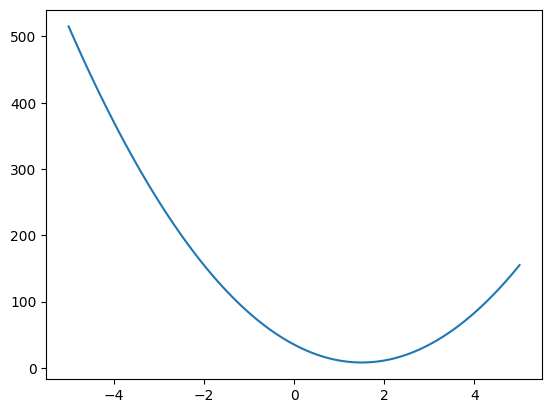

In [127]:
def df(x):
 return simplify(f(x).diff(x))
print("Производная функции:")
display(df(x))
df_D = continuous_domain(df(x), x, S.Reals) # Это область определения производной.
print("Область определения:")
display(df_D)
X = np.linspace(-5, 5, 100)
X_df_D = [x for x in X if x in df_D] # Отбираем только точки из области определения производной.
df_num, df_denom = fraction(df(x))
df_num_Y = [df_num.subs(x, x0) for x0 in X_df_D] # Значения числителя производной в точках, где существует производная.
plt.plot(X_df_D, df_num_Y)
df_roots = sympy.solve(df(x),S.Reals)
print("Экстремумы:", df_roots)

***Точки перегиба***

In [128]:
# Найдем вторую производную
def df2(x):
 return simplify(f(x).diff(x, 2))
display(df2(x))
df2_roots = sympy.solve(df2(x))
print("Точки перегиба:", df2_roots)

-32/(8*x**3 - 36*x**2 + 54*x - 27)

Точки перегиба: []


***Асимптоты***

Возможна вертикальная асимптота в точке 1.5. Вычислим соответствующие пределы

In [130]:
f(x).limit(x, 1.5)

-oo

***График функции***

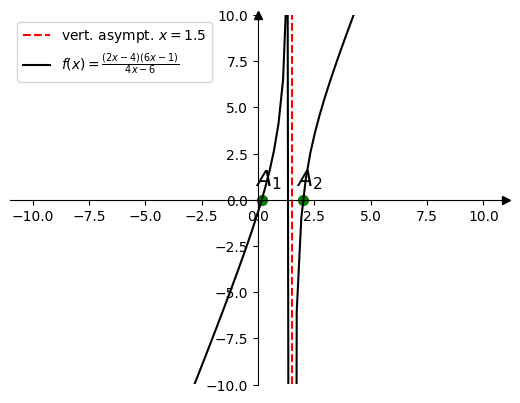

In [131]:
minY = -10
maxY = 10
ax = plt.gca()
ax.set_ylim(minY, maxY)
v_as = 1.5
ax.axvline(x=v_as, color='red', linestyle='--',
 label=r'vert. asympt. $x=' + latex(v_as) + r'$') # График вертикальной асимптоты
X = np.linspace(-10, 10, 100)
X_D = [x for x in X if x in D]
Y_D = [f(x) for x in X if x in D]
ax.plot(X_D, Y_D, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')
roots = sympy.solve(f(x))
points_y = [float(f(point)) for point in roots]
annotations = [r'$A_1$', r'$A_2$']
ax.scatter(roots, points_y, 50, color='green')
for i, x0 in enumerate(roots):
 ax.annotate(annotations[i], xy=(x0, points_y[i]), xycoords='data',
 xytext=(-5, 10), textcoords='offset points', fontsize=16)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.legend(loc='upper left')
plt.show()